# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [ ]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64", no_graphics=True)

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
print("This the shape of the states: {}".format(states.shape))
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        print(type(actions), actions.shape, actions)
        break
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name='./Tennis_Linux/Tennis.x86_64', no_graphics=True)
#env = UnityEnvironment(file_name='./Tennis_Linux/Tennis.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name] 

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [2]:
# Initialization of the training process
from maddpg import MADDPG
from collections import deque

# Number of episodes
number_of_episodes = 1000
episode_length = 1000 

# Multi-Agent declaration
maddpg_agents = MADDPG(action_size=brain.vector_action_space_size)

# Scores reteiners
scores = np.zeros((1,2))
scores_window = deque(maxlen=100)
running_scores = []

# Noise factor
noise_factor = 2.0
noise_reduction = 0.9999

In [3]:
for i_episodes in range(1, number_of_episodes):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    score = 0
    for step in range(episode_length):
        actions = maddpg_agents.acts_local(states,noise_factor)
        noise_factor *= noise_reduction
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        maddpg_agents.step(states, actions, rewards, next_states, dones)
        state = next_states
        scores += rewards
        if np.any(dones):
            break
    scores_window.append(np.amax(scores))
    running_scores.append(np.amax(scores))
    if i_episodes % 10 == 0:
            print('Episode {}\tAverage Score so far: {:.2f}'.format(i_episodes,
                                                              np.mean(running_scores)))
    if np.mean(scores_window) >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episodes,
                                                                                        np.mean(scores_window)))
            # saved the DL weights and architecture that solve the problem
            maddpg_agents.save_models_weights
            env.close()
            break

Episode 10	Average Score so far: -0.01
Episode 20	Average Score so far: 0.00
Episode 30	Average Score so far: 0.07
Episode 40	Average Score so far: 0.10
Episode 50	Average Score so far: 0.11
Episode 60	Average Score so far: 0.11
Episode 70	Average Score so far: 0.10
Episode 80	Average Score so far: 0.09
Episode 90	Average Score so far: 0.08
Episode 100	Average Score so far: 0.08
Episode 110	Average Score so far: 0.07
Episode 120	Average Score so far: 0.06
Episode 130	Average Score so far: 0.07
Episode 140	Average Score so far: 0.10
Episode 150	Average Score so far: 0.12
Episode 160	Average Score so far: 0.15
Episode 170	Average Score so far: 0.17
Episode 180	Average Score so far: 0.18
Episode 190	Average Score so far: 0.19
Episode 200	Average Score so far: 0.21
Episode 210	Average Score so far: 0.22
Episode 220	Average Score so far: 0.24
Episode 230	Average Score so far: 0.25
Episode 240	Average Score so far: 0.27

Environment solved in 240 episodes!	Average Score: 0.50


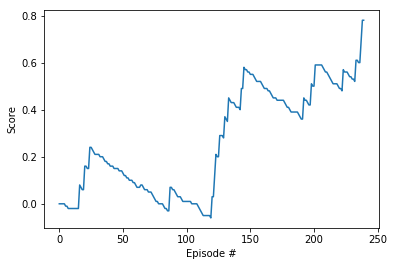

In [4]:
# plot the scores of the mean of the best score
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(running_scores)), running_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

